In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [7]:
kiva_loan = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
loan_themes =  pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')
mpi=pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv')
mpi.head(2)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538


In [8]:
themes = loan_themes[loan_themes['country']== 'Brazil'].reset_index(drop = True)
themes.tail(5)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
3,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Diadema,NaN,BRA,...,222400,"Diadema, Brazil","[(-23.6818396, -46.620967)]",Diadema; Diadema; SÍ£o Paulo; Brazil,"(-23.6818396, -46.620967)",-23.681840,-46.620967,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
4,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Maua,NaN,BRA,...,225375,"Maua, Brazil","[(-23.668163, -46.46170859999999)]",MauÍ; MauÍ; SÍ£o Paulo; Brazil,"(-23.668163, -46.46170859999999)",-23.668163,-46.461709,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
5,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Santo AndrÍ©,NaN,BRA,...,122925,"Santo AndrÍ©, Brazil","[(-23.6742228, -46.5436003)]",Santo AndrÍ©; Santo AndrÍ©; State of SÍ£o Paul...,"(-23.6742228, -46.5436003)",-23.674223,-46.543600,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
6,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,SÍ£o Paulo,NaN,BRA,...,77850,"SÍ£o Paulo, Brazil","[(-23.5505199, -46.63330939999999)]",SÍ£o Paulo; SÍ£o Paulo; State of SÍ£o Paulo; B...,"(-23.5505199, -46.63330939999999)",-23.550520,-46.633309,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
7,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Vila Luzita,NaN,BRA,...,21200,"Vila Luzita, Brazil","[(-23.7010504, -46.5071589)]",Vila Luzita; Santo AndrÍ©; SÍ£o Paulo; Brazil,"(-23.7010504, -46.5071589)",-23.701050,-46.507159,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0


In [9]:
kiva_loan.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


In [10]:
kiva_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [11]:
brazil = kiva_loan[kiva_loan['country']== 'Brazil'].reset_index(drop = True)
brazil.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,654797,1700.0,1700.0,Cosmetics Sales,Retail,"To buy cream, perfume/cologne, makeup",BR,Brazil,Sorocaba,BRL,337.0,2014-01-07 16:34:52+00:00,2013-12-23 08:00:00+00:00,2014-01-09 00:31:09+00:00,11.0,58,"user_favorite, user_favorite",female,monthly,2014-01-07
1,669512,1875.0,1875.0,Printing,Services,"To buy material for banner printing, wooden st...",BR,Brazil,Sorocaba,BRL,337.0,2014-02-13 15:42:23+00:00,2014-01-30 08:00:00+00:00,2014-02-14 07:53:13+00:00,15.0,73,"user_favorite, user_favorite",male,monthly,2014-02-13
2,669507,2500.0,2500.0,Retail,Retail,"To buy books, magazines, and newspapers",BR,Brazil,Sorocaba,BRL,337.0,2014-02-13 15:39:02+00:00,2014-01-30 08:00:00+00:00,2014-02-14 09:21:13+00:00,15.0,85,"user_favorite, user_favorite, user_favorite",female,monthly,2014-02-13
3,675805,225.0,225.0,Services,Services,to buy games for PlayStation for resale,BR,Brazil,Sorocaba,BRL,337.0,2014-02-24 18:08:00+00:00,2014-02-14 08:00:00+00:00,2014-02-26 00:10:47+00:00,9.0,9,NaN,male,monthly,2014-02-24
4,675798,650.0,650.0,Services,Services,To buy raw materials to produce perfumes and s...,BR,Brazil,Sorocaba,BRL,337.0,2014-02-24 17:56:58+00:00,2014-01-30 08:00:00+00:00,2014-02-24 19:37:11+00:00,10.0,21,NaN,female,irregular,2014-02-24


In [12]:
brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  284 non-null    int64  
 1   funded_amount       284 non-null    float64
 2   loan_amount         284 non-null    float64
 3   activity            284 non-null    object 
 4   sector              284 non-null    object 
 5   use                 243 non-null    object 
 6   country_code        284 non-null    object 
 7   country             284 non-null    object 
 8   region              243 non-null    object 
 9   currency            284 non-null    object 
 10  partner_id          284 non-null    float64
 11  posted_time         284 non-null    object 
 12  disbursed_time      284 non-null    object 
 13  funded_time         282 non-null    object 
 14  term_in_months      284 non-null    float64
 15  lender_count        284 non-null    int64  
 16  tags    

In [13]:
brazil.isnull().sum()

id                     0
funded_amount          0
loan_amount            0
activity               0
sector                 0
use                   41
country_code           0
country                0
region                41
currency               0
partner_id             0
posted_time            0
disbursed_time         0
funded_time            2
term_in_months         0
lender_count           0
tags                  29
borrower_genders      41
repayment_interval     0
date                   0
dtype: int64

In [14]:
brazil.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [15]:
country_with_most_loans = kiva_loan ['country'].value_counts().head(10). reset_index()
country_with_most_loans.columns = ['country', 'counts']
country_with_most_loans

,country,counts
0,Philippines,160441
1,Kenya,75825
2,El Salvador,39875
3,Cambodia,34836
4,Pakistan,26857
5,Peru,22233
6,Colombia,21995
7,Uganda,20601
8,Tajikistan,19580
9,Ecuador,13521


In [16]:
country_with_most_loans = kiva_loan.groupby ('country')['loan_amount'].sum().sort_values(ascending = False). reset_index().head(10)
country_with_most_loans

,country,loan_amount
0,Philippines,55342225.0
1,Kenya,34534300.0
2,United States,31496375.0
3,Peru,30867400.0
4,Paraguay,29629075.0
5,El Salvador,26603650.0
6,Cambodia,19872700.0
7,Bolivia,19843250.0
8,Rwanda,16646300.0
9,Uganda,15389350.0


In [17]:
sector_with_most_loans = brazil ['sector'].value_counts().head(10). reset_index()
sector_with_most_loans

,index,sector
0,Retail,70
1,Services,70
2,Clothing,61
3,Food,47
4,Arts,22
5,Construction,6
6,Wholesale,2
7,Health,2
8,Agriculture,2
9,Transportation,1


In [18]:
sector_with_most_loans = brazil.groupby ('sector')['loan_amount'].sum().sort_values(ascending = False). reset_index().head(10)
sector_with_most_loans

,sector,loan_amount
0,Retail,196775.0
1,Services,150500.0
2,Clothing,112400.0
3,Food,97625.0
4,Agriculture,32625.0
5,Construction,31925.0
6,Arts,30925.0
7,Wholesale,4075.0
8,Health,3550.0
9,Transportation,1200.0


In [19]:
brazil["sector"].value_counts()

Retail            70
Services          70
Clothing          61
Food              47
Arts              22
Construction       6
Wholesale          2
Health             2
Agriculture        2
Transportation     1
Manufacturing      1
Name: sector, dtype: int64

In [20]:
retail = brazil[brazil['sector']== 'Retail'] 
retail.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,654797,1700.0,1700.0,Cosmetics Sales,Retail,"To buy cream, perfume/cologne, makeup",BR,Brazil,Sorocaba,BRL,337.0,2014-01-07 16:34:52+00:00,2013-12-23 08:00:00+00:00,2014-01-09 00:31:09+00:00,11.0,58,"user_favorite, user_favorite",female,monthly,2014-01-07
2,669507,2500.0,2500.0,Retail,Retail,"To buy books, magazines, and newspapers",BR,Brazil,Sorocaba,BRL,337.0,2014-02-13 15:39:02+00:00,2014-01-30 08:00:00+00:00,2014-02-14 09:21:13+00:00,15.0,85,"user_favorite, user_favorite, user_favorite",female,monthly,2014-02-13


In [21]:
loan_activity = retail.groupby ('activity')['loan_amount'].sum().sort_values(ascending = False). reset_index().head(10)
loan_activity

,activity,loan_amount
0,Cosmetics Sales,47525.0
1,Home Products Sales,34250.0
2,Retail,30500.0
3,General Store,16200.0
4,Personal Products Sales,9575.0
5,Phone Accessories,8300.0
6,Electrical Goods,8100.0
7,Jewelry,7325.0
8,Electronics Sales,6975.0
9,Shoe Sales,5825.0


In [22]:
loan_amount_by_regions = brazil.groupby ('region')['loan_amount'].sum().sort_values(ascending = False). reset_index().head(10)
loan_amount_by_regions

,region,loan_amount
0,Diadema,184425.0
1,Maua,183500.0
2,Santo André,117775.0
3,São Paulo,32400.0
4,Botucatu,30000.0
5,Sorocaba,28475.0
6,Vila Luzita,21200.0
7,Rio de Janeiro,13550.0
8,Perdizes,700.0


In [23]:
data_frame=loan_amount_by_regions
fig=px.bar(data_frame, x = 'region', y = 'loan_amount',text='loan_amount', title='Top region with high loan amount', labels={'sector':'Sector','loan_amount':'Loan amount'},color='loan_amount')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(xaxis_tickangle=-45,yaxis_tickangle=-45, title_font_size=20, title_x=0.5)
fig.show()

In [24]:
repayment_interval= brazil.groupby('repayment_interval')['loan_amount'].sum().sort_values(ascending = False).reset_index()
repayment_interval

,repayment_interval,loan_amount
0,irregular,483150.0
1,monthly,164800.0
2,bullet,14250.0


In [25]:
lamount_per_sector = brazil.groupby('sector')['repayment_interval'].count().sort_values(ascending = False).reset_index()
lamount_per_sector

,sector,repayment_interval
0,Retail,70
1,Services,70
2,Clothing,61
3,Food,47
4,Arts,22
5,Construction,6
6,Agriculture,2
7,Health,2
8,Wholesale,2
9,Manufacturing,1


In [26]:
brazil["borrower_genders"]

0                                      female
1                                        male
2                                      female
3                                        male
4                                      female
                        ...                  
279    female, female, female, female, female
280    female, female, female, female, female
281            female, female, female, female
282              male, female, female, female
283            female, female, female, female
Name: borrower_genders, Length: 284, dtype: object

In [28]:
gender_list=[]
for gender in brazil['borrower_genders'].values:#Goes through every row in the column
    if str(gender) != 'nan':
        gender_list.extend([lst.strip() for lst in gender.split(',')])
temp_data = pd.Series(gender_list).value_counts()
gender = temp_data.to_frame().head(20).reset_index()
gender.columns = ['Gender', 'Frequency']

gender

,Gender,Frequency
0,female,651
1,male,187


In [29]:
lamount_per_sector = brazil.groupby('sector')['loan_amount'].sum().sort_values(ascending = False).reset_index()
lamount_per_sector

,sector,loan_amount
0,Retail,196775.0
1,Services,150500.0
2,Clothing,112400.0
3,Food,97625.0
4,Agriculture,32625.0
5,Construction,31925.0
6,Arts,30925.0
7,Wholesale,4075.0
8,Health,3550.0
9,Transportation,1200.0


In [30]:
top10_loan_activities = brazil.groupby('activity')['loan_amount'].count().sort_values (ascending = False).reset_index(). head (10)
top10_loan_activities

,activity,loan_amount
0,Clothing Sales,54
1,Beauty Salon,39
2,Crafts,19
3,Cosmetics Sales,18
4,Services,15
5,Home Products Sales,12
6,Retail,10
7,Food,10
8,Food Production/Sales,8
9,Clothing,7


In [31]:
data_frame=top10_loan_activities
fig=px.bar(data_frame, x = 'activity', y = 'loan_amount',text='loan_amount', title='Top 10 loan activities with high loan amount', labels={'sector':'Sector','loan_amount':'Loan amount'},color='loan_amount')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(xaxis_tickangle=-45,yaxis_tickangle=-45, title_font_size=20, title_x=0.5)
fig.show()

[Text(0, 0.5, 'loan_amount')]

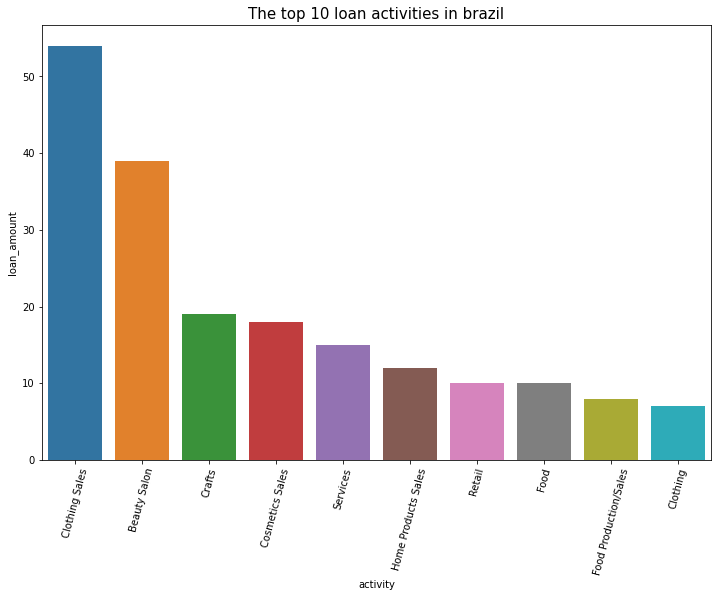

In [32]:
plt.figure (figsize = (12,8))
plt.title('The top 10 loan activities in brazil', fontsize = 15)

plt.xticks(rotation = 75)

sns.barplot (x= 'activity', y= 'loan_amount', data = top10_loan_activities). set(ylabel = 'loan_amount')

In [33]:
themes = loan_themes[loan_themes['country']== 'Brazil'].reset_index(drop = True)
themes.tail(5)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
3,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Diadema,NaN,BRA,...,222400,"Diadema, Brazil","[(-23.6818396, -46.620967)]",Diadema; Diadema; SÍ£o Paulo; Brazil,"(-23.6818396, -46.620967)",-23.681840,-46.620967,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
4,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Maua,NaN,BRA,...,225375,"Maua, Brazil","[(-23.668163, -46.46170859999999)]",MauÍ; MauÍ; SÍ£o Paulo; Brazil,"(-23.668163, -46.46170859999999)",-23.668163,-46.461709,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
5,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Santo AndrÍ©,NaN,BRA,...,122925,"Santo AndrÍ©, Brazil","[(-23.6742228, -46.5436003)]",Santo AndrÍ©; Santo AndrÍ©; State of SÍ£o Paul...,"(-23.6742228, -46.5436003)",-23.674223,-46.543600,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
6,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,SÍ£o Paulo,NaN,BRA,...,77850,"SÍ£o Paulo, Brazil","[(-23.5505199, -46.63330939999999)]",SÍ£o Paulo; SÍ£o Paulo; State of SÍ£o Paulo; B...,"(-23.5505199, -46.63330939999999)",-23.550520,-46.633309,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0
7,464,Banco do Povo CrÍ©dito Solidario,General Financial Inclusion,a1050000000da2V,General,Brazil,No,Vila Luzita,NaN,BRA,...,21200,"Vila Luzita, Brazil","[(-23.7010504, -46.5071589)]",Vila Luzita; Santo AndrÍ©; SÍ£o Paulo; Brazil,"(-23.7010504, -46.5071589)",-23.701050,-46.507159,"SÍo Paulo, Brazil","(-23.5671844, -46.7387185)",73.0


In [34]:
loan_themes = pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')
data_frame=themes.head(10)
fig=px.bar(data_frame, x = 'Field Partner Name', y = 'region',text='region', title='most dominant field partner', labels={'Field Partner Name':'Field Partner Name','region':'Region'},color='region')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(xaxis_tickangle=-45,yaxis_tickangle=-45, title_font_size=20, title_x=0.5)
fig.show()
themes ['Field Partner Name'].value_counts(). reset_index(). head(10)

,index,Field Partner Name
0,Banco do Povo CrÍ©dito Solidario,5
1,Yunus Social Business (YSB),2
2,Novica,1


In [35]:
themes.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

,partner_id,lender_count
0,464.0,205
1,337.0,63
2,225.0,14
3,315.0,2


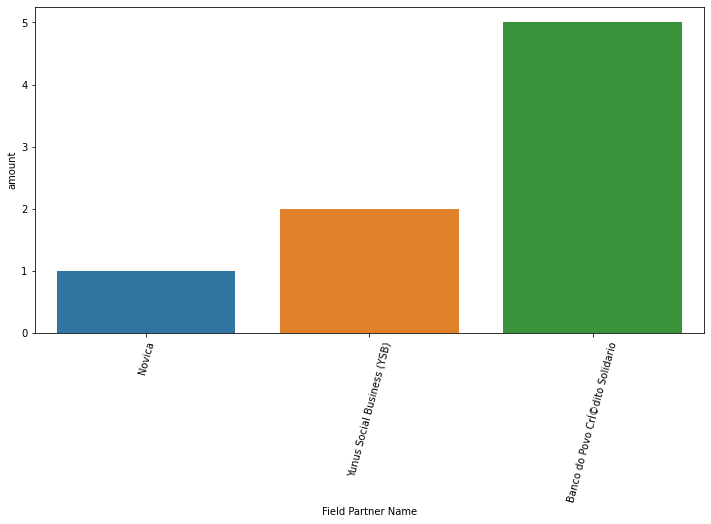

In [37]:
data_frame=themes.head(10)
fig=px.bar(data_frame, x = 'Field Partner Name', y = 'amount',text='amount', title='The partner names and their total loan amount', labels={'Field Partner Name':'Field Partner Name','amount':'Amount'},color='amount')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(xaxis_tickangle=-45,yaxis_tickangle=-45, title_font_size=20, title_x=0.5)
fig.show()
plt.figure (figsize = (12,6))
plt.xticks (rotation = 75)
sns.countplot (x= 'Field Partner Name', data = themes). set(ylabel = 'amount')

dominant_field_partners = brazil.groupby ('partner_id')['lender_count'].count(). sort_values (ascending = False). reset_index().head(10)
dominant_field_partners

[Text(0, 0.5, 'Count')]

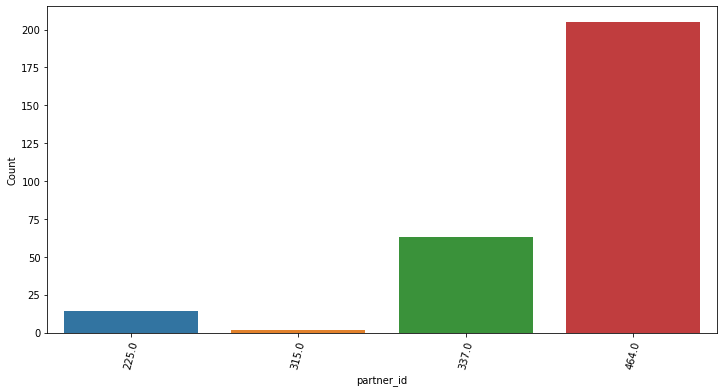

In [38]:
plt.figure (figsize = (12,6))
plt.xticks (rotation = 75)
sns.barplot (x= 'partner_id', y= 'lender_count', data = dominant_field_partners). set(ylabel = 'Count')

In [39]:
loan_themes.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [40]:
mpi=pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv')
mpi.head(10)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
5,"Daykundi, Afghanistan",AFG,Afghanistan,Daykundi,South Asia,0.313,"(33.669495, 66.0463534)",33.669495,66.046353
6,"Farah, Afghanistan",AFG,Afghanistan,Farah,South Asia,0.319,"(32.4464635, 62.1454133)",32.446464,62.145413
7,"Faryab, Afghanistan",AFG,Afghanistan,Faryab,South Asia,0.250,"(36.0795613, 64.90595499999999)",36.079561,64.905955
8,"Ghazni, Afghanistan",AFG,Afghanistan,Ghazni,South Asia,0.245,"(33.5450587, 68.4173972)",33.545059,68.417397
9,"Ghor, Afghanistan",AFG,Afghanistan,Ghor,South Asia,0.384,"(34.0995776, 64.90595499999999)",34.099578,64.905955


In [41]:
partnernames_loans = themes.groupby ('Field Partner Name')['amount'].sum(). sort_values (ascending = False). reset_index()
partnernames_loans.head(10)

,Field Partner Name,amount
0,Banco do Povo CrÍ©dito Solidario,669750
1,Yunus Social Business (YSB),50000
2,Novica,6900


In [42]:
fig = px.pie(partnernames_loans, values ='amount', names='Field Partner Name', title='Field parter names by Amount')
plt.figure(figsize=(10,10))
fig

<Figure size 720x720 with 0 Axes>

[Text(0, 0.5, 'Count')]

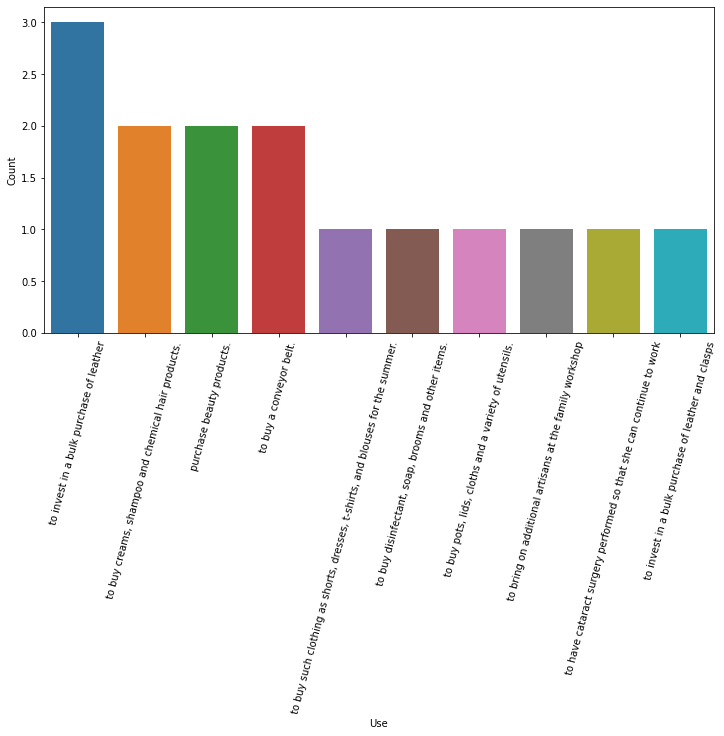

In [43]:
loan_uses = brazil ['use'].value_counts().head(10). reset_index()
loan_uses.columns = ['Use', 'Count']
plt.figure (figsize = (12,6))
plt.xticks (rotation = 75)
sns.barplot (x= 'Use', y= 'Count', data = loan_uses). set(ylabel= 'Count')

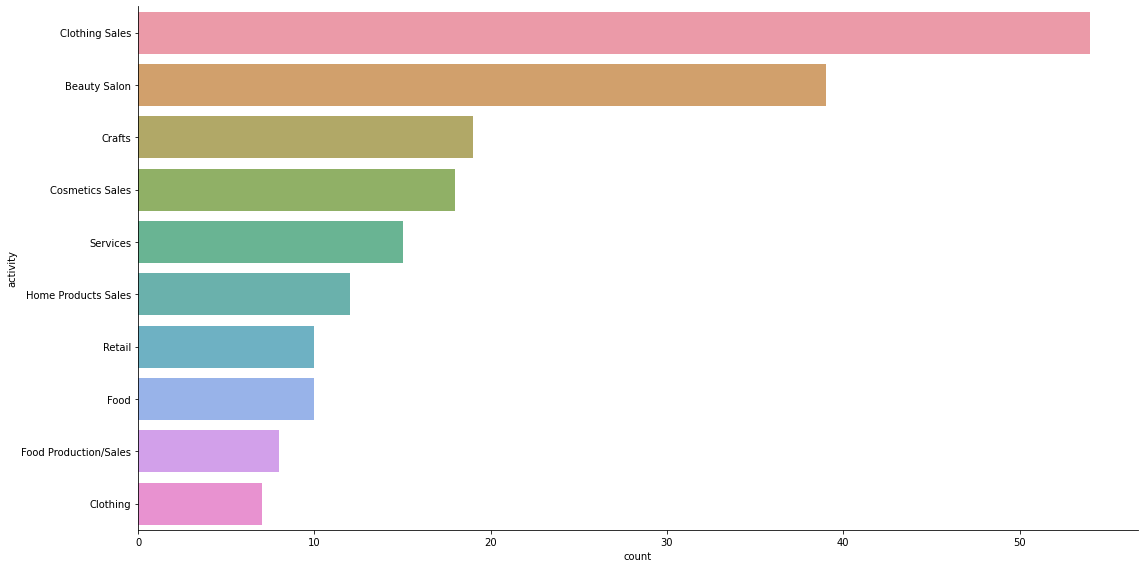

In [44]:
sns.catplot(data=brazil,kind='count',y='activity',x=None,height=8, aspect=2,
order=pd.value_counts(brazil['activity']).iloc[:10].index,alpha=.8,palette='husl')

In [45]:
px.set_mapbox_access_token('pk.eyJ1IjoiZXJuZXN0NDA0IiwiYSI6ImNrOWlmOG1idjAwdTEzbHBjdnB5MzFndXEifQ.i_TnCFGI64JcmoA0caIhgQ')
loan_amount_by_regions = brazil.groupby ('region')['loan_amount'].sum().sort_values(ascending = False). reset_index().head(10)
loan_amount_by_regions 

,region,loan_amount
0,Diadema,184425.0
1,Maua,183500.0
2,Santo André,117775.0
3,São Paulo,32400.0
4,Botucatu,30000.0
5,Sorocaba,28475.0
6,Vila Luzita,21200.0
7,Rio de Janeiro,13550.0
8,Perdizes,700.0


In [46]:
fig = px.pie(loan_amount_by_regions, values ='loan_amount', names='region', title='Loan Amount by Regions')
fig
px.scatter_mapbox(themes, lat='lat', lon='lon', color='region', size='amount',center = dict(lat = -22.9068467, lon = -46.5071589))

In [47]:
brazil.corr()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
id,1.000000,0.266664,0.268875,0.735828,-0.355944,0.242408
funded_amount,0.266664,1.000000,0.999702,0.136095,0.629498,0.976490
loan_amount,0.268875,0.999702,1.000000,0.137125,0.628942,0.976094
partner_id,0.735828,0.136095,0.137125,1.000000,-0.454005,0.123894
term_in_months,-0.355944,0.629498,0.628942,-0.454005,1.000000,0.607261
lender_count,0.242408,0.976490,0.976094,0.123894,0.607261,1.000000


<AxesSubplot:>

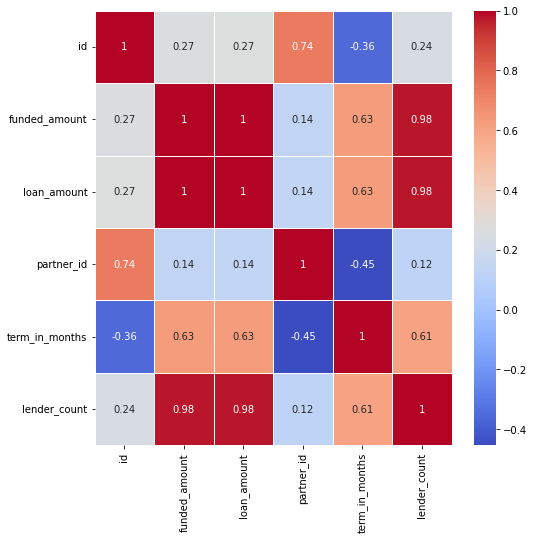

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap (brazil.corr(), annot = True, cmap = 'coolwarm', linewidth = 0.5)

In [50]:
px.histogram(x = 'loan_amount', data_frame = brazil)

<AxesSubplot:ylabel='country'>

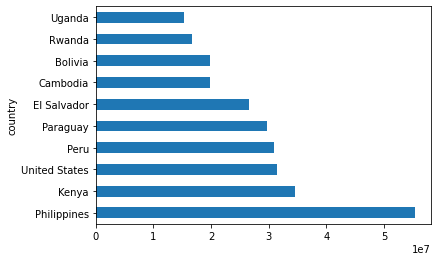

In [51]:
kiva_loan['loan_amount'].groupby(kiva_loan['country']).sum().sort_values(ascending=False)[:10].plot(kind='barh')

In [52]:
kiva_regions=pd.read_csv('../input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')
kiva_regions.head(5)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [53]:
data_frame=themes.head(10)
fig=px.bar(data_frame, x = 'Field Partner Name', y = 'region',text='region', title='most dominant field partner', labels={'Field Partner Name':'Field Partner Name','region':'Region'},color='region')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide') 
fig.update_layout(xaxis_tickangle=-45,yaxis_tickangle=-45, title_font_size=20, title_x=0.5)
fig.show()